# Часть 1

## 1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

## Решение
Прокурор оценивает P(иметь редкую группу крови | невиновен), более того, утверждает, что имеет место зависимость P(посудимый виновен | иметь редкую группу крови) = 1 - P(иметь редкую группу крови | невиновен), хотя здесь очевидна необходимость использование формулы Байеса (и приведение к одному событию: виновен или невиновен). Это не взаимоисключающие события. 
Должен был оценить: P(виновность подсудимого | иметь редкую группу крови), P(виновность подсудимого | произошло убийство), P(виновность подсудимого | быть подозреваемым или прочие улики).

## 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.

## Решение
Адвокат оценил следующую вероятность: P(случайным образом выбрать человека с редкой группой крови среди всей популяции) = 10000 / 1000000 = 0.01.
Это никак не отражает то, что на самом деле волнует присяжных (и должен привести адвокат): 
- P(невиновность подсудимого | иметь редкую группу крови)
- P(невиновность подсудимого | произошло убийство)
- P(невиновность подсудимого | быть подозреваемым или прочие улики)

## 3
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

Text(0.5, 0, 'false negative (false positive fixed)')

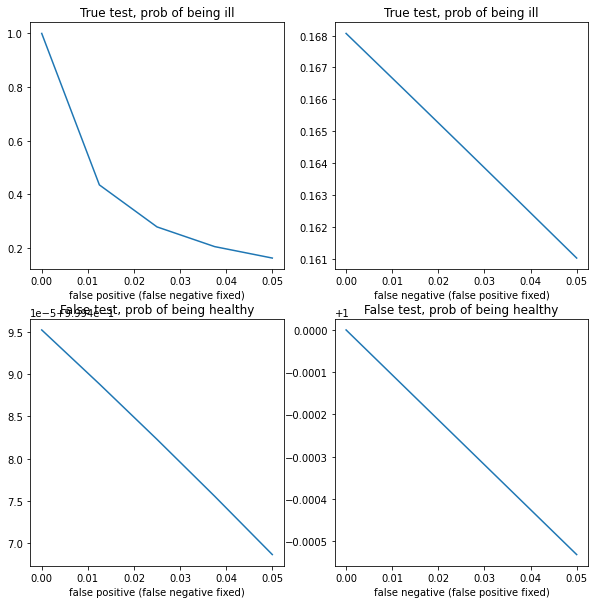

In [ ]:
DESEASE_PROB = 0.01

def p_1_1(false_positive_prob : float, false_negative_prob: float) -> float:
    true_positive_prob = 1.0 - false_negative_prob
    true_negative_prob = 1.0 - false_positive_prob
    nom = true_positive_prob*DESEASE_PROB
    return nom / (nom + false_positive_prob * (1.0-DESEASE_PROB))
    
def p_0_0(false_positive_prob : float, false_negative_prob: float) -> float:
    true_positive_prob = 1.0 - false_negative_prob
    true_negative_prob = 1.0 - false_positive_prob
    nom = true_negative_prob*(1.0-DESEASE_PROB)
    return nom / (nom + false_negative_prob * DESEASE_PROB)


import numpy as np
import matplotlib.pyplot as plt 

POINT_NUM = 5
OLD_PROB = 0.05

x = np.linspace(0, OLD_PROB, POINT_NUM, endpoint=True)
y = [p_1_1(item, OLD_PROB) for item in x] 


fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(x, y)
axs[0, 0].set_title('True test, prob of being ill')
axs[0, 0].set_xlabel('false positive (false negative fixed)') 
y = [p_1_1(OLD_PROB, item) for item in x] 
axs[0, 1].plot(x, y)
axs[0, 1].set_title('True test, prob of being ill')
axs[0, 1].set_xlabel('false negative (false positive fixed)') 

y = [p_0_0(item, OLD_PROB) for item in x] 
axs[1, 0].plot(x, y)
axs[1, 0].set_title('False test, prob of being healthy')
axs[1, 0].set_xlabel('false positive (false negative fixed)') 

y = [p_0_0(OLD_PROB, item) for item in x] 
axs[1, 1].plot(x, y)
axs[1, 1].set_title('False test, prob of being healthy')
axs[1, 1].set_xlabel('false negative (false positive fixed)')    

Выводы:
если ученые хотят достаточно точно вычислять больных, то им лучше поработать над false negative ошибкой.

# Часть 2

# 1
Скачайте данные в формате csv https://ourworldindata.org/coronavirus-source-data, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [ ]:
import pandas as pd
import datetime


df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv') # pd.read_csv('owid-covid-data.csv')
df_ru = df[(df['location'] == 'Russia') & (df['date'] >= '2020-03-03')] 
df_ru['new_cases']=df_ru['new_cases'].replace(0,1)

df_ru.reset_index(inplace=True)
df_ru.drop('index', 1, inplace=True)
df_ru.reset_index(inplace=True)


df_ru_train = df_ru[:50]
df_ru_test = df_ru[50:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 2
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.



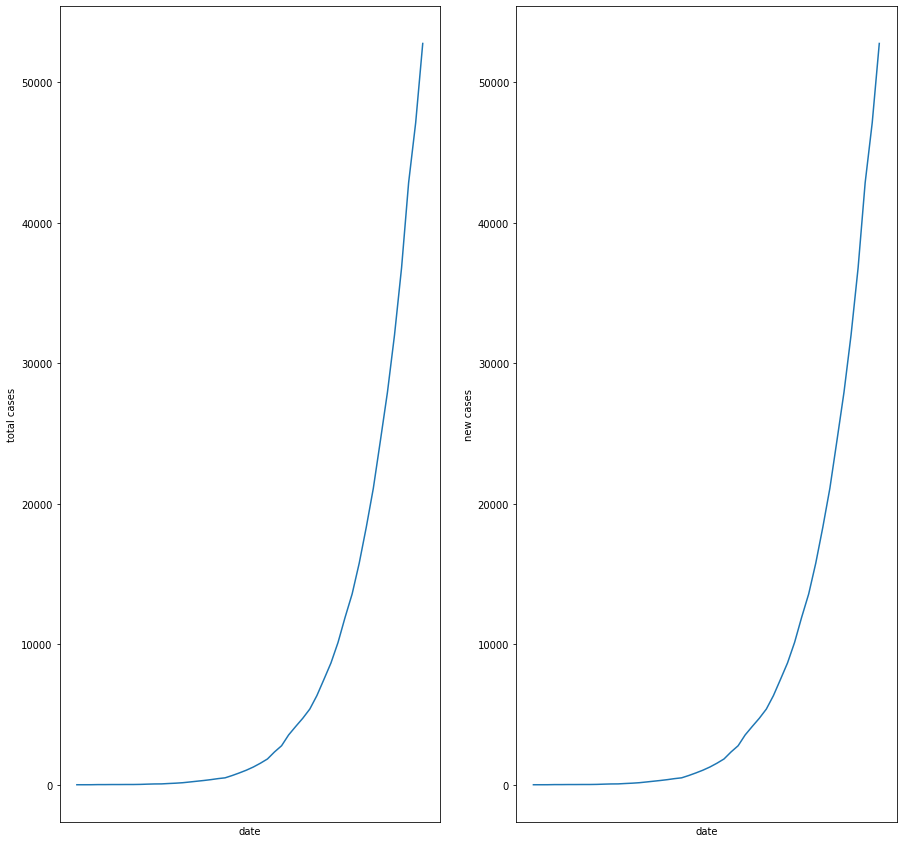

In [ ]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].plot(df_ru_train['date'], df_ru_train['total_cases']) 
axs[0].set_xlabel('date')
axs[0].set_ylabel('total cases') 
axs[0].set_xticks([])

axs[1].plot(df_ru_train['date'], df_ru_train['total_cases']) 
axs[1].set_xlabel('date')
axs[1].set_ylabel('new cases') 
_ = axs[1].set_xticks([])

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

[0.19829091] 1.820737148784695


Text(0.5, 1.0, 'Exponential Fit')

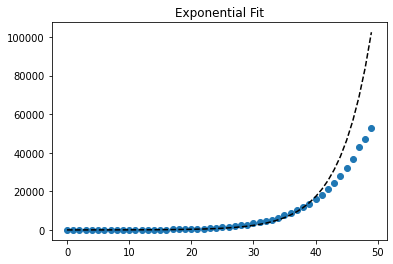

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
import numpy as np

x_train = np.array(df_ru_train['index']).reshape(-1, 1)
y_train = np.array(df_ru_train['total_cases'])

y_train = np.log(y_train)

regressor = LinearRegression()
regressor_fit = regressor.fit(x_train, y_train)                
model = regressor_fit.predict
y_fit = model(x_train)

print(regressor.coef_, regressor.intercept_)

plt.scatter(x_train, np.exp(y_train))
plt.plot(x_train, np.exp(y_fit), "k--")    
plt.title("Exponential model")


[0.19829091 1.82073715]


Text(0.5, 1.0, 'Exponential model')

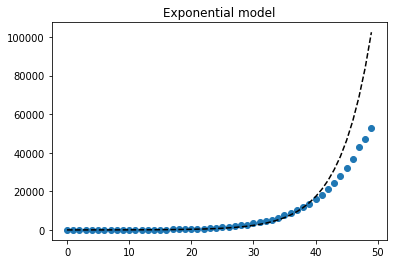

In [ ]:
# another way

coefs = np.polyfit(np.array(df_ru_train['index']), np.log(np.array(df_ru_train['total_cases'])), 1)
print(coefs)

plt.scatter(x_train, np.exp(y_train))
plt.plot(x_train, np.exp(x_train*coefs[0] + coefs[1]), "k--")    
plt.title("Exponential model")

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [ ]:
import scipy.stats as st
import scipy.integrate as integrate
from math import exp
import math

DATASET_SIZE = 50
HIGH_STD_DEV_FOR_PRIOR = 0.2
HIGH_VARIANCE_FOR_PRIOR = HIGH_STD_DEV_FOR_PRIOR * HIGH_STD_DEV_FOR_PRIOR
w0 = coefs[0]
w1 = coefs[1]


sum_of_sq_dev = 0
for i in range(DATASET_SIZE):
    sum_of_sq_dev += ((x_train[i]*w0 + w1) - np.log(y_train[i]))**2

    
variance = (1/DATASET_SIZE) * (sum_of_sq_dev[0])
print(f'variance: {variance}')

# Априорные распределения
pri_w0 = st.norm(loc=0, scale=HIGH_STD_DEV_FOR_PRIOR).pdf
pri_w1 = st.norm(loc=0, scale=HIGH_STD_DEV_FOR_PRIOR).pdf

# Правдоподобие
def lk(w0, w1):
    result = 1.0
    for i in range (DATASET_SIZE):
        result *= st.norm(loc=x_train[i]*w0+w1, scale=math.sqrt(variance)).pdf(math.log(y_train[i]))
    return result


post_proportional = lambda w0, w1: pri_w0(w0) * pri_w1(w1) * lk(w0, w1)
# Апостериорное распределение
norm_post = integrate.nquad(post_proportional, 
                            [[-3.0*HIGH_STD_DEV_FOR_PRIOR, 3.0*HIGH_STD_DEV_FOR_PRIOR],
                           [-3.0*HIGH_STD_DEV_FOR_PRIOR, 3.0*HIGH_STD_DEV_FOR_PRIOR]])[0]

print(f'normalization constant: {norm_post}')
post = lambda w0, w1: post_proportional(w0, w1) / norm_post

variance: 29.613950035502985
normalization constant: 1.8768003000038056e-58


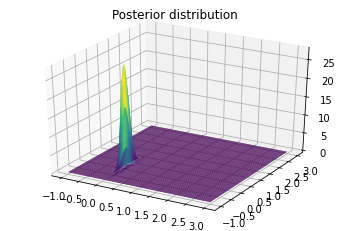

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 3, 100) # w0
y = np.linspace(-1, 3, 100) # w1

X, Y = np.meshgrid(x, y)
Z = post(X, Y) # dist(w0, w1)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Posterior distribution');

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? 

(None, None)
0.029710073230067024 0.1148279467676212
1st May: 6            1st June: 17            1st September: 265
0.0457986201913807 0.4926814383433209
1st May: 26            1st June: 110            1st September: 7477
0.10016296222433718 0.12765424899576683
1st May: 511            1st June: 11414            1st September: 114678061
0.059019204046137475 0.5211049618187953
1st May: 61            1st June: 384            1st September: 87608
0.1076628981358898 0.27952478066652664
1st May: 941            1st June: 26489            1st September: 530588877
0.08862086114058387 0.5693751152399873
1st May: 393            1st June: 6139            1st September: 21329754
0.08124147148892269 0.09295344712103026
1st May: 155            1st June: 1933            1st September: 3407141
0.08084549360026716 0.05997984749845209
1st May: 147            1st June: 1804            1st September: 3064977
0.04061372592502677 0.7153092119056998
1st May: 24            1st June: 85            1st Septemb

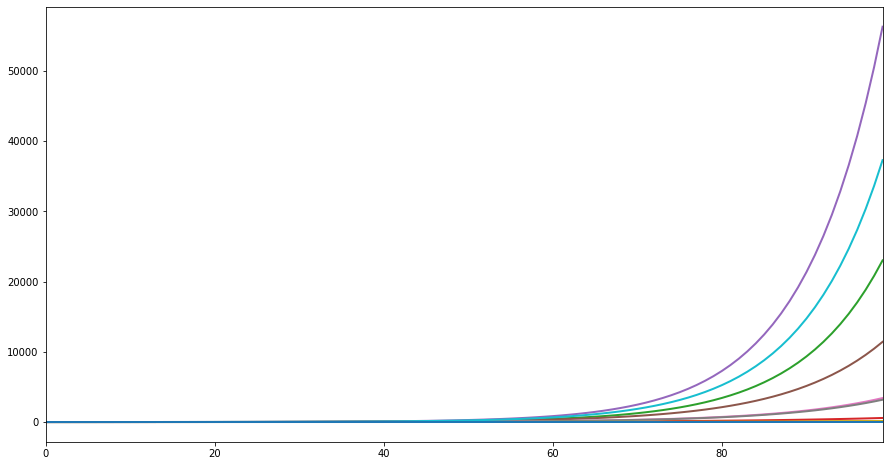

In [ ]:
x_uniform = st.uniform(loc=0, scale=2)
y_uniform = st.uniform(loc=0, scale=2)
z_uniform = st.uniform(loc=0, scale=np.max(Z).any())
 
# sample uniformly x,y,z. Reject if z is greater than PDF 
def get_sample():
    x = x_uniform.rvs()
    y = y_uniform.rvs()
    z = z_uniform.rvs()    
    if(z < post(x,y)):
        return x,y
    return None,None

xs = range(100)
figsize = (15,8)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))

def myplot_sample_lines(w0, w1):
    preds = [ math.exp(x*w0 + w1) for x in xs ]
    ax.plot(xs, preds, linewidth=2) 
    print(f'1st May: {int(math.exp(61*w0 + w1))} \
           1st June: {int(math.exp(92*w0 + w1))} \
           1st September: {int(math.exp(184*w0 + w1))}')


print(get_sample())
for i in range(500):
    w0,w1 = get_sample()
    if w0:
        print (w0,w1)
        myplot_sample_lines(w0,w1)

Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [ ]:
'''
uses explicit formula for 2D Gaussian 
-- distribution for log(y) -- don't forget to exponentiate it
assuming that priors have zero means (Mu0 = 0)
'''
def predict_dist(x, t):
    x_array = np.array([x,1])
    x_array_t = np.array([[x],[1]])
    SIGMA_N = (1/HIGH_VARIANCE_FOR_PRIOR)*np.identity(2) + (1/variance)*np.transpose(x_array)*x_array
    MU_N = (t/variance) * SIGMA_N.dot(x_array_t)   
    MU_N_t = np.transpose(MU_N)
    mu = MU_N_t.dot(x_array_t)
    sigma = variance + x_array.dot(SIGMA_N).dot(x_array_t)
    return st.norm(mu, sigma).pdf

log_y = predict_dist(1,1)
print(math.exp(log_y(1)))

1.005014815880532


Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.
Обучите эти параметры на датасете случаев коронавируса в России. 

# Решение

Способ обучения следующий. 
Будем действовать исходя из определения интеграла (предел частичных СУММ) -- то есть совсем упрощенно -- некая накопительная сумма.
Проинтегрируем нашу функцию и получим:
Ф'(y) = exp(a*x^2 + b^x + c)

Получается, что предсказывать будем производную от нашей целевой переменной total_cases, чем по существу является new_cases (обратная к накопительной сумме). Обучим нашу сигмоиду на new_cases и получим предсказания для new_cases.
Чтобы произвести обратную операцию (то есть от new_cases перейти к total_cases) сделаем кумулятивную сумму от new_cases (от нулевого до нужного нам дня) и получим значение total_cases.

[ 0.          0.27562283 -0.00182979] -0.39659040284160696
[-0.00182979  0.27562283 -0.3965904 ]


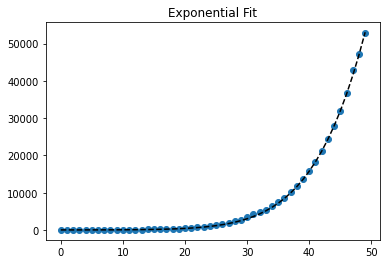

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

X = np.array(df_ru_train['index']).reshape(-1, 1)
y = np.array(df_ru_train['new_cases'])

poly_deg_2 = PolynomialFeatures(degree = 2) 
X_poly_deg_2 = poly_deg_2.fit_transform(X) 
  
lin_deg_2 = LinearRegression() 
lin_deg_2.fit(X_poly_deg_2, np.log(y))

y_total_cases = np.array(df_ru_train['total_cases'])
predicted_new_cases = np.exp(lin_deg_2.predict(X_poly_deg_2))
predicted_total_cases = np.cumsum(predicted_new_cases)

plt.scatter(X, y_total_cases)
plt.plot(X, predicted_total_cases, "k--", label="Fit")    
plt.title("Exponential model")

print(lin_deg_2.coef_, lin_deg_2.intercept_)

coefs = np.polyfit(np.array(df_ru_train['index']), np.log(y), 2)
print(coefs)

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [ ]:
import scipy.stats as st
import scipy.integrate as integrate
from math import exp
import math

DATASET_SIZE = 50
HIGH_STD_DEV_FOR_PRIOR = 0.2
HIGH_VARIANCE_FOR_PRIOR = HIGH_STD_DEV_FOR_PRIOR * HIGH_STD_DEV_FOR_PRIOR
w0 = coefs[0]
w1 = coefs[1]
w2 = coefs[2]

sum_of_sq_dev = 0
for i in range(DATASET_SIZE):
    sum_of_sq_dev += (y - predicted_new_cases)**2

    
variance = (1/DATASET_SIZE) * (sum_of_sq_dev[0])
print(f'variance: {variance}')

## Априорное распределение
pri_w0 = st.norm(loc=0, scale=HIGH_STD_DEV_FOR_PRIOR).pdf
pri_w1 = st.norm(loc=0, scale=HIGH_STD_DEV_FOR_PRIOR).pdf
pri_w2 = st.norm(loc=0, scale=HIGH_STD_DEV_FOR_PRIOR).pdf

# Правдоподобие для производной от функции
def lk(w0, w1, w2):
    result = 1.0
    for i in range (DATASET_SIZE):
        result *= st.norm(loc=x_train[i]**2*w0+x_train[i]*w1+w2, scale=math.sqrt(variance)).pdf(math.log(y[i]))
    return result


post_proportional = lambda w0, w1, w2: pri_w0(w0) * pri_w1(w1) * pri_w2(w2) * lk(w0, w1, w2)
# Апостериорное распределение для new_cases
norm_post = integrate.nquad(post_proportional, 
                            [[-1.0*HIGH_STD_DEV_FOR_PRIOR, 1.0*HIGH_STD_DEV_FOR_PRIOR],
                           [-1.0*HIGH_STD_DEV_FOR_PRIOR, 1.0*HIGH_STD_DEV_FOR_PRIOR],
                            [-1.0*HIGH_STD_DEV_FOR_PRIOR, 1.0*HIGH_STD_DEV_FOR_PRIOR]])[0]

print(f'normalization constant: {norm_post}')

# можем считать, что апостериорное распределение (w0, w1, w2) при подсчете через total_cases было бы таким же
post_new_cases = lambda w0, w1, w2: post_proportional(w0, w1, w2) / norm_post

variance: 0.10718456034801706
normalization constant: 6.489260865693926e-38


Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [ ]:
x_uniform = st.uniform(loc=0, scale=1)
y_uniform = st.uniform(loc=0, scale=1)
z_uniform = st.uniform(loc=0, scale=1)
t_uniform = st.uniform(loc=-10, scale=10)
    
# sample uniformly x,y,z,t. Reject if t is greater than PDF 
def get_sample():
    x = x_uniform.rvs()
    y = y_uniform.rvs()
    z = z_uniform.rvs()
    t = y_uniform.rvs()  
    if(t < post_new_cases(x,y,z)):
        return x,y,z
    return None,None,None

xs = range(100)

print(post_new_cases(1,1,1))

predictions_for_100th_day = []


fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))

def myplot_sample_lines(w0, w1, w2):
    preds = [ math.exp(x**2*w0 + x*w1 + x*w2) for x in xs ]
    cumsum_preds = np.cumsum(preds)
    predictions_for_100th_day.append(cumsum_preds[99])
    print(f'prediction for 100th day: {cumsum_preds[99]}')
    ax.plot(xs, cumsum_preds, linewidth=2) 



print(get_sample())
for i in range(1000):
    w0,w1,w2 = get_sample()
    if w0:        
        myplot_sample_lines(w0,w1,w2)
        
print(f'optimistic prediction for 100th day (since 1st March): {np.percentile(predictions_for_100th_day, 10)}')
print(f'pessimistic prediction for 100th day (since 1st March): {np.percentile(predictions_for_100th_day, 90)}')